## IMPORT DATA <a class="anchor" id="IMPORTDATA"></a>

In [1]:
# Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc
import scipy.sparse as sparse
from scipy.stats import norm, skew
from scipy import stats
from scipy.sparse.linalg import spsolve
import statsmodels.api as sm

# sklearn modules for data preprocessing:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

# sklearn modules for Model Selection:

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

# Standard libraries for data visualization:

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
from pandas.plotting import register_matplotlib_converters

# Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
from dateutil import relativedelta
import joblib

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('General population.csv', sep=",")

### 1.1 General Population Data 

In [3]:
df.head() #View the first 5 

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,low,25,M,No,NaN,NaN,karu,tecno,t484,Feature Phone,proprietary os,proprietary os


In [4]:
df.shape

(500000, 19)

In [5]:
df.isna().sum()

msisdn                     0
spend_total                0
spend_vas                  0
sms_cost                   0
spend_voice                0
spend_data                 0
customer_class             0
customer_value             0
age                        0
gender                  4348
has_bank                   0
location_region        43948
location_state         43948
location_lga           17364
device_manufacturer    11723
device_model           11839
device_type            19293
os_vendor              19014
os_name                19015
dtype: int64

There's a lot missing/no data in columns (**gender, location_region,location_state, location_state, location_lga,device_manufacturer, device_model, device_type, os_vendor, os_name**).

In [6]:
# check for duplicate rows

Gp = df.duplicated().any()

In [7]:
Gp

False

No duplicate rows found

In [8]:
df_duplicates_removed = df

## Data Cleaning

In [9]:
df_duplicates_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   msisdn               500000 non-null  object 
 1   spend_total          500000 non-null  float64
 2   spend_vas            500000 non-null  float64
 3   sms_cost             500000 non-null  float64
 4   spend_voice          500000 non-null  float64
 5   spend_data           500000 non-null  float64
 6   customer_class       500000 non-null  int64  
 7   customer_value       500000 non-null  object 
 8   age                  500000 non-null  int64  
 9   gender               495652 non-null  object 
 10  has_bank             500000 non-null  object 
 11  location_region      456052 non-null  object 
 12  location_state       456052 non-null  object 
 13  location_lga         482636 non-null  object 
 14  device_manufacturer  488277 non-null  object 
 15  device_model     

In [10]:
df_duplicates_removed.isna().sum()

msisdn                     0
spend_total                0
spend_vas                  0
sms_cost                   0
spend_voice                0
spend_data                 0
customer_class             0
customer_value             0
age                        0
gender                  4348
has_bank                   0
location_region        43948
location_state         43948
location_lga           17364
device_manufacturer    11723
device_model           11839
device_type            19293
os_vendor              19014
os_name                19015
dtype: int64

In [11]:
df.loc[:, "age"].replace([[2020,20],[-73,73],[-67,67],[-64,64],[-63,63],[-57,57],[-51,51],[-44,44]], inplace = True)

In [12]:
df['age']

0         25
1         24
2         42
3         32
4         25
          ..
499995    35
499996    30
499997    70
499998    37
499999    30
Name: age, Length: 500000, dtype: int64

In [13]:
df.columns[df_duplicates_removed.isnull().any()]

Index(['gender', 'location_region', 'location_state', 'location_lga',
       'device_manufacturer', 'device_model', 'device_type', 'os_vendor',
       'os_name'],
      dtype='object')

In [14]:
# Missing values denote Installations or Downloads that are not applicable to a client
# so we will replace them with 'None' and '0'

df_duplicates_removed.loc[:,"gender"].replace(np.nan,0,inplace=True)
df_duplicates_removed.loc[:,"location_region"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"location_state"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"location_lga"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"device_manufacturer"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"device_model"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"device_type"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"os_vendor"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"os_name"].replace(np.nan,"None",inplace=True)
df_duplicates_removed.loc[:,"spend_vas"].replace(np.nan,0,inplace=True)
df_duplicates_removed.loc[:,"sms_cost"].replace(np.nan,0,inplace=True)
df_duplicates_removed.loc[:,"spend_voice"].replace(np.nan,0,inplace=True)

In [15]:
df_duplicates_removed.isna().sum()

msisdn                 0
spend_total            0
spend_vas              0
sms_cost               0
spend_voice            0
spend_data             0
customer_class         0
customer_value         0
age                    0
gender                 0
has_bank               0
location_region        0
location_state         0
location_lga           0
device_manufacturer    0
device_model           0
device_type            0
os_vendor              0
os_name                0
dtype: int64

In [16]:
df_duplicates_removed.columns[df_duplicates_removed.isnull().any()] #All missing values removed

Index([], dtype='object')

In [17]:
df_duplicates_removed.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,low,25,M,No,None,None,karu,tecno,t484,Feature Phone,proprietary os,proprietary os


### 3. APPLY ENCODING

In [18]:
# Deriving Age groups from Timestamp column
df_duplicates_removed['Age_Group'] = 'Between 24 to 65 Years'
df_duplicates_removed.loc[df_duplicates_removed['age'] >64,'Age_Group'] = 'Senior' 
df_duplicates_removed.loc[df_duplicates_removed['age'] <= 64,'Age_Group'] = 'Middle- Aged'
df_duplicates_removed.loc[df_duplicates_removed['age'] <= 35,'Age_Group'] = 'Adult'
df_duplicates_removed.loc[df_duplicates_removed['age'] <= 24,'Age_Group'] = 'Youth'

df_duplicates_removed.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Age_Group
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian,Adult
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os,Youth
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os,Middle- Aged
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os,Adult
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,low,25,M,No,None,None,karu,tecno,t484,Feature Phone,proprietary os,proprietary os,Adult


In [19]:
# Get list of categorical variables
s = (df_duplicates_removed.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['msisdn', 'customer_value', 'gender', 'has_bank', 'location_region', 'location_state', 'location_lga', 'device_manufacturer', 'device_model', 'device_type', 'os_vendor', 'os_name', 'Age_Group']


In [20]:
CustomerValue = pd.get_dummies(df_duplicates_removed["customer_value"])

In [21]:
DeviceType = pd.get_dummies(df_duplicates_removed["device_type"])
DeviceType.rename(columns = {'Feature Phone':'FeaturePhone'}, inplace = True)

In [22]:
AgeGroup = pd.get_dummies(df_duplicates_removed["Age_Group"])

In [23]:
locationstate = pd.get_dummies(df_duplicates_removed["location_state"])
locationstate.rename(columns = {'None':'Unknown'}, inplace = True)

In [24]:
CustomerValue.head()

,high,low,medium,top,very high
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [25]:
DeviceType.head()

,FeaturePhone,None,Smartphone
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
AgeGroup.head()

,Adult,Middle- Aged,Senior,Youth
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


In [27]:
locationstate.head()

,Unknown,abia,adamawa,akwa ibom,anambra,bauchi,bayelsa,benue,borno,cross river,delta,ebonyi,edo,ekiti,enugu,fct,gombe,imo,jigawa,kaduna,kano,katsina,kebbi,kogi,kwara,lagos,nassarawa,niger,ogun,ondo,osun,oyo,plateau,rivers,sokoto,taraba,yobe,zamfara
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
expanded_dataset = pd.concat([df_duplicates_removed.drop(['customer_value'], axis=1), CustomerValue], axis=1)
expanded_dataset.rename(columns = {'high' : 'Customer_Value_High','low' : 'Customer_Value_Low','medium' : 'Customer_Value_Medium','top' : 'Customer_Value_Top','very high' : 'Customer_Value_Very_High','0' : 'Customer_Value_None'}, inplace = True)
expanded_dataset.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Age_Group,Customer_Value_High,Customer_Value_Low,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian,Adult,0,0,1,0,0
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os,Youth,0,0,1,0,0
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os,Middle- Aged,1,0,0,0,0
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os,Adult,0,0,1,0,0
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,25,M,No,None,None,karu,tecno,t484,Feature Phone,proprietary os,proprietary os,Adult,0,1,0,0,0


In [29]:
expanded_dataset = pd.concat([expanded_dataset.drop(['device_type'], axis=1), DeviceType], axis=1)
expanded_dataset.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,os_vendor,os_name,Age_Group,Customer_Value_High,Customer_Value_Low,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,25,F,No,north central,benue,kwande,nokia,1280,1282,symbian,Adult,0,0,1,0,0,0,0,1
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,24,M,No,north east,taraba,takum,alcatel,ot735i,proprietary os,proprietary os,Youth,0,0,1,0,0,1,0,0
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,42,F,No,south west,ekiti,ado ekiti,tecno,t349,proprietary os,proprietary os,Middle- Aged,1,0,0,0,0,1,0,0
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,32,M,No,north east,borno,askira/uba,tecno,t350,proprietary os,proprietary os,Adult,0,0,1,0,0,1,0,0
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,25,M,No,None,None,karu,tecno,t484,proprietary os,proprietary os,Adult,0,1,0,0,0,1,0,0


In [30]:
expanded_dataset = pd.concat([expanded_dataset.drop(['Age_Group'], axis=1), AgeGroup], axis=1)
expanded_dataset.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,os_vendor,os_name,Customer_Value_High,Customer_Value_Low,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone,Adult,Middle- Aged,Senior,Youth
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,25,F,No,north central,benue,kwande,nokia,1280,1282,symbian,0,0,1,0,0,0,0,1,1,0,0,0
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,24,M,No,north east,taraba,takum,alcatel,ot735i,proprietary os,proprietary os,0,0,1,0,0,1,0,0,0,0,0,1
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,42,F,No,south west,ekiti,ado ekiti,tecno,t349,proprietary os,proprietary os,1,0,0,0,0,1,0,0,0,1,0,0
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,32,M,No,north east,borno,askira/uba,tecno,t350,proprietary os,proprietary os,0,0,1,0,0,1,0,0,1,0,0,0
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,25,M,No,None,None,karu,tecno,t484,proprietary os,proprietary os,0,1,0,0,0,1,0,0,1,0,0,0


In [31]:
expanded_dataset = pd.concat([expanded_dataset.drop(['location_state'], axis=1), locationstate], axis=1)
expanded_dataset.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,has_bank,location_region,location_lga,device_manufacturer,device_model,os_vendor,os_name,Customer_Value_High,Customer_Value_Low,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone,Adult,Middle- Aged,Senior,Youth,Unknown,abia,adamawa,akwa ibom,anambra,bauchi,bayelsa,benue,borno,cross river,delta,ebonyi,edo,ekiti,enugu,fct,gombe,imo,jigawa,kaduna,kano,katsina,kebbi,kogi,kwara,lagos,nassarawa,niger,ogun,ondo,osun,oyo,plateau,rivers,sokoto,taraba,yobe,zamfara
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46,25,F,No,north central,kwande,nokia,1280,1282,symbian,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46,24,M,No,north east,takum,alcatel,ot735i,proprietary os,proprietary os,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46,42,F,No,south west,ado ekiti,tecno,t349,proprietary os,proprietary os,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186,32,M,No,north east,askira/uba,tecno,t350,proprietary os,proprietary os,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46,25,M,No,None,karu,tecno,t484,proprietary os,proprietary os,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

expanded_dataset['gender'] = number.fit_transform(expanded_dataset['gender'].astype(str))
expanded_dataset['has_bank'] = number.fit_transform(expanded_dataset['has_bank'].astype(str))
expanded_dataset['location_region'] = number.fit_transform(expanded_dataset['location_region'].astype(str))

In [33]:
#Checking new column names
expanded_dataset.columns

Index(['msisdn', 'spend_total', 'spend_vas', 'sms_cost', 'spend_voice',
       'spend_data', 'customer_class', 'age', 'gender', 'has_bank',
       'location_region', 'location_lga', 'device_manufacturer',
       'device_model', 'os_vendor', 'os_name', 'Customer_Value_High',
       'Customer_Value_Low', 'Customer_Value_Medium', 'Customer_Value_Top',
       'Customer_Value_Very_High', 'FeaturePhone', 'None', 'Smartphone',
       'Adult', 'Middle- Aged', 'Senior', 'Youth', 'Unknown', 'abia',
       'adamawa', 'akwa ibom', 'anambra', 'bauchi', 'bayelsa', 'benue',
       'borno', 'cross river', 'delta', 'ebonyi', 'edo', 'ekiti', 'enugu',
       'fct', 'gombe', 'imo', 'jigawa', 'kaduna', 'kano', 'katsina', 'kebbi',
       'kogi', 'kwara', 'lagos', 'nassarawa', 'niger', 'ogun', 'ondo', 'osun',
       'oyo', 'plateau', 'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara'],
      dtype='object')

In [34]:
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = expanded_dataset.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    expanded_dataset[i] = d[i].transform(expanded_dataset[i].fillna('NA'))

In [35]:
expanded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   msisdn                    500000 non-null  int32  
 1   spend_total               500000 non-null  float64
 2   spend_vas                 500000 non-null  float64
 3   sms_cost                  500000 non-null  float64
 4   spend_voice               500000 non-null  float64
 5   spend_data                500000 non-null  float64
 6   customer_class            500000 non-null  int64  
 7   age                       500000 non-null  int64  
 8   gender                    500000 non-null  int32  
 9   has_bank                  500000 non-null  int32  
 10  location_region           500000 non-null  int32  
 11  location_lga              500000 non-null  int32  
 12  device_manufacturer       500000 non-null  int32  
 13  device_model              500000 non-null  i

### Define Target Variable <a class="anchor" id="DefineTargetVariable_4_1"></a>

Before defining the parameters for our target variable, we will first find pattern in our data using unsupervised learning, K-Means clustering

In [36]:
expanded_dataset[expanded_dataset.columns[1:]].head()

,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,has_bank,location_region,location_lga,device_manufacturer,device_model,os_vendor,os_name,Customer_Value_High,Customer_Value_Low,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone,Adult,Middle- Aged,Senior,Youth,Unknown,abia,adamawa,akwa ibom,anambra,bauchi,bayelsa,benue,borno,cross river,delta,ebonyi,edo,ekiti,enugu,fct,gombe,imo,jigawa,kaduna,kano,katsina,kebbi,kogi,kwara,lagos,nassarawa,niger,ogun,ondo,osun,oyo,plateau,rivers,sokoto,taraba,yobe,zamfara
0,399.22,0.0,0.0,0.000000,0.0,46,25,1,0,1,443,667,81,260,415,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,686.34,75.0,0.0,6.800000,0.0,46,24,2,0,2,681,24,5609,552,377,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2392.28,295.0,12.0,925.500000,700.0,46,42,1,0,6,14,901,6950,552,377,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,588.82,0.0,24.0,593.333334,0.0,186,32,2,0,2,67,901,6952,552,377,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.00,4655.0,0.0,336.845000,0.0,46,25,2,0,0,405,901,6997,552,377,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
RANDOM_STATE = 200 # seed to recreate results

Text(0, 0.5, 'Inertia')

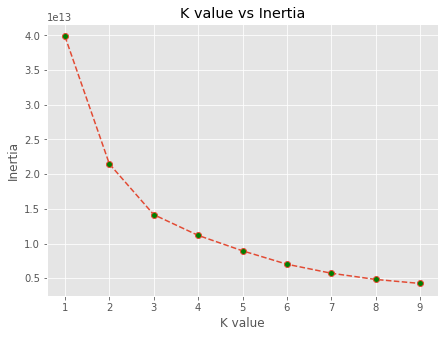

In [38]:
#Using the elbow method to find the optimum number of clusters

X = expanded_dataset[expanded_dataset.columns[1:]]

inertia_list = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state = RANDOM_STATE)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
# Show graph elbow method
plt.figure(figsize=(7,5))
plt.plot(range(1,10),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [39]:
# Declaring Model
model = KMeans(n_clusters=2, random_state = RANDOM_STATE)

# Fitting Model
labels = model.fit_predict(X)
data = pd.DataFrame(labels)

In [40]:
data.value_counts()

0    499989
1        11
dtype: int64

In [41]:
expanded_dataset['spend_total'].describe()

count    5.000000e+05
mean     1.589771e+03
std      8.351637e+03
min      0.000000e+00
25%      8.355000e+01
50%      4.999000e+02
75%      1.626288e+03
max      2.070064e+06
Name: spend_total, dtype: float64

* The above model shows customers are divided into **2** clusters
* We will define the target variable based on these **2** clusters (**99%** in cluster **0**, **0.003%** in cluster **1**)

* We can see that **50%** of customers have an average spent_total of **499.900 spent total** 
* So we take the **75%** percentile at roughly **1626.288** & use it as the cutoff point to help define the target variable.
* We will define a Priority_Customer as someone who has an average spend_total of at least **1626.288**,
* customer_value other than **Low**,
* has_bank as **No**.

In [42]:
expanded_dataset["spend_total"] = expanded_dataset["spend_total"].map(lambda val: 1 if val < 1626.288 else 0)

expanded_dataset['Priority_Customers'] = expanded_dataset["spend_total"] + expanded_dataset["Customer_Value_Low"] + expanded_dataset["has_bank"]
# if spend_total + Customer_Value_Low + has_bank is equal to 0 then, Priority_Customers = 1
expanded_dataset['Priority_Customers'] = expanded_dataset['Priority_Customers'].map(lambda val: 1 if val == 0 else 0)

expanded_dataset['Priority_Customers'].value_counts()

0    379388
1    120612
Name: Priority_Customers, dtype: int64

**120612** out of **500001** Clients are our **Priority Customers**.

In [43]:
# We have to drop the spend_total & Customer_Value_Low and has_bank columns because they are dependant variables
expanded_dataset1 = expanded_dataset.copy()
expanded_dataset1.drop(['spend_total','Customer_Value_Low','has_bank'], axis = 1, inplace=True)

## EXPLORATORY DATA ANALYSIS <a class="anchor" id="EXPLORATORYDATAANALYSIS"></a>

In [44]:
expanded_dataset1.head()

,msisdn,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,location_region,location_lga,device_manufacturer,device_model,os_vendor,os_name,Customer_Value_High,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone,Adult,Middle- Aged,Senior,Youth,Unknown,abia,adamawa,akwa ibom,anambra,bauchi,bayelsa,benue,borno,cross river,delta,ebonyi,edo,ekiti,enugu,fct,gombe,imo,jigawa,kaduna,kano,katsina,kebbi,kogi,kwara,lagos,nassarawa,niger,ogun,ondo,osun,oyo,plateau,rivers,sokoto,taraba,yobe,zamfara,Priority_Customers
0,1890,0.0,0.0,0.000000,0.0,46,25,1,1,443,667,81,260,415,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2121,75.0,0.0,6.800000,0.0,46,24,2,2,681,24,5609,552,377,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3028,295.0,12.0,925.500000,700.0,46,42,1,6,14,901,6950,552,377,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3067,0.0,24.0,593.333334,0.0,186,32,2,2,67,901,6952,552,377,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3302,4655.0,0.0,336.845000,0.0,46,25,2,0,405,901,6997,552,377,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
expanded_dataset1.describe()

,msisdn,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age,gender,location_region,location_lga,device_manufacturer,device_model,os_vendor,os_name,Customer_Value_High,Customer_Value_Medium,Customer_Value_Top,Customer_Value_Very_High,FeaturePhone,None,Smartphone,Adult,Middle- Aged,Senior,Youth,Unknown,abia,adamawa,akwa ibom,anambra,bauchi,bayelsa,benue,borno,cross river,delta,ebonyi,edo,ekiti,enugu,fct,gombe,imo,jigawa,kaduna,kano,katsina,kebbi,kogi,kwara,lagos,nassarawa,niger,ogun,ondo,osun,oyo,plateau,rivers,sokoto,taraba,yobe,zamfara,Priority_Customers
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.00000,500000.000000
mean,249999.500000,138.773644,21.395610,819.892826,122.037559,56.114154,35.623558,1.706382,3.431052,361.504240,649.812790,4696.559288,478.346200,300.842028,0.172818,0.314836,0.012462,0.048440,0.483404,0.038586,0.478010,0.425538,0.390374,0.025982,0.158106,0.087896,0.024024,0.018224,0.017602,0.023118,0.021400,0.007304,0.018098,0.014420,0.013452,0.020150,0.009176,0.015836,0.013706,0.023896,0.036086,0.013248,0.019012,0.015200,0.040252,0.060290,0.028286,0.015162,0.014672,0.022916,0.103682,0.016822,0.025028,0.053786,0.021450,0.028136,0.033134,0.020188,0.043168,0.02039,0.013682,0.012598,0.01451,0.241224
std,144337.711634,813.666812,117.921872,1656.200822,537.653915,55.978606,11.766889,0.474130,2.041666,227.365855,270.789995,2468.611927,106.465498,97.110840,0.378090,0.464451,0.110936,0.214694,0.499725,0.192606,0.499517,0.494425,0.487835,0.159082,0.364841,0.283144,0.153124,0.133761,0.131500,0.150278,0.144714,0.085151,0.133306,0.119214,0.115200,0.140513,0.095351,0.124841,0.116268,0.152725,0.186504,0.114335,0.136567,0.122348,0.196550,0.238024,0.165789,0.122197,0.120236,0.149636,0.304848,0.128604,0.156210,0.225595,0.144879,0.165361,0.178987,0.140643,0.203235,0.14133,0.116167,0.111532,0.11958,0.427826
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,44.000000,27.000000,1.000000,2.000000,165.000000,451.000000,3409.000000,422.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
50%,249999.500000,0.000000,0.000000,208.642500,0.000000,46.000000,33.000000,2.000000,3.000000,370.000000,677.000000,4870.000000,552.000000,377.00

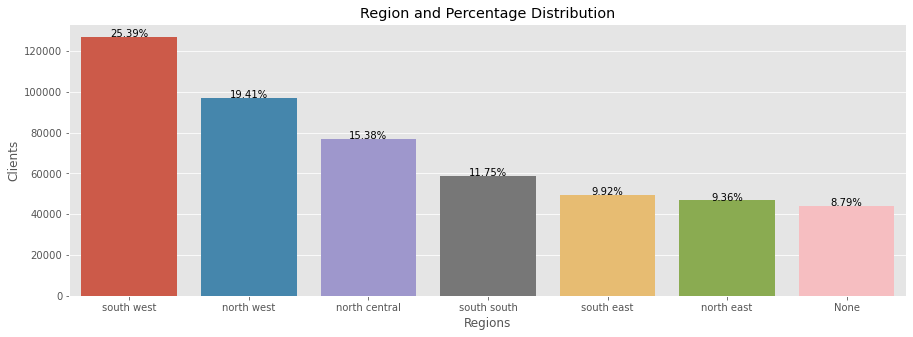

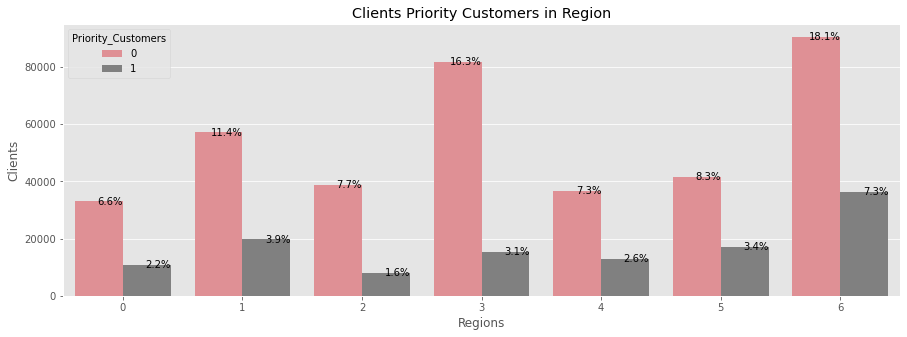

In [46]:
# Visualization for RegionName Column

location_region = df_duplicates_removed['location_region'].value_counts()

total = len(df_duplicates_removed)
plt.figure(figsize=(15,5))
ax = sns.barplot(location_region.index, location_region.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

plt.title("Region and Percentage Distribution")
plt.xlabel("Regions")
plt.ylabel("Clients")
plt.show()

plt.figure(figsize=(15,5))
splot=sns.countplot(data=expanded_dataset,x='location_region',palette=["#ec838a", "grey"],hue = 'Priority_Customers')
total = float(len(expanded_dataset))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'right', va = 'center')
plt.title("Clients Priority Customers in Region")
plt.xlabel('Regions')
plt.ylabel('Clients')
plt.show()

* 0 = None
* 1 = North Central
* 2 = North East
* 3 = Noth West
* 4 = South East
* 5 = South South
* 6 = South West

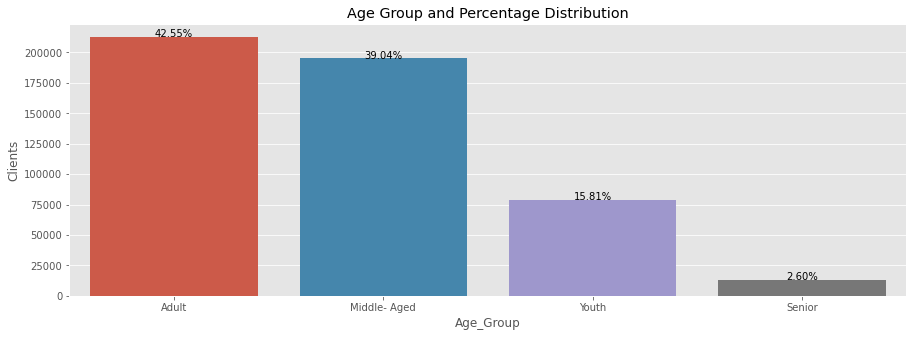

In [47]:
# Visualization for Clients Age Group

Age_Group = df_duplicates_removed['Age_Group'].value_counts()

total = len(df_duplicates_removed)
plt.figure(figsize=(15,5))
ax = sns.barplot(Age_Group.index, Age_Group.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

plt.title("Age Group and Percentage Distribution")
plt.xlabel("Age_Group")
plt.ylabel("Clients")
plt.show()

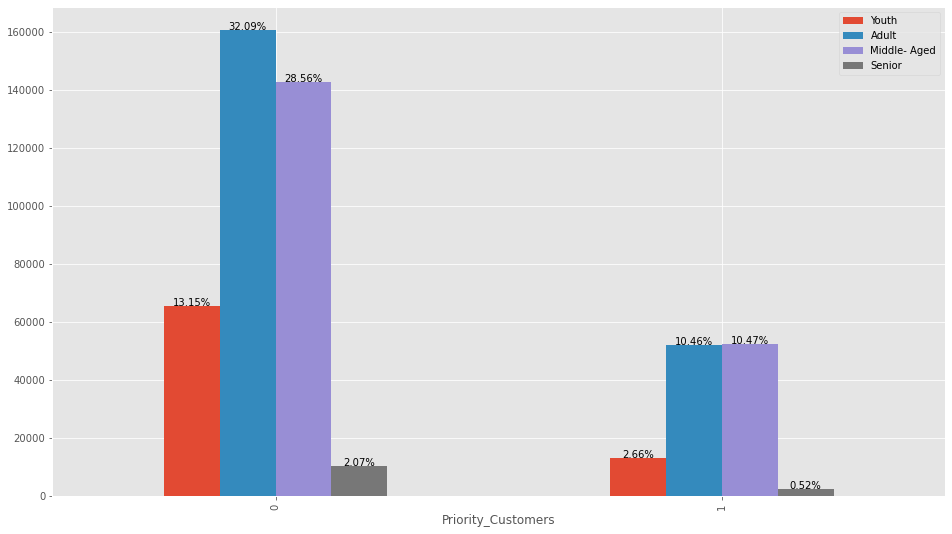

In [48]:
AgeGr = expanded_dataset.groupby(['Priority_Customers']).agg({'Youth':sum,
                                                   'Adult':sum,
                                                   'Middle- Aged':sum,
                                                   'Senior':sum}).reset_index()

AgeGrx = AgeGr.plot(x= "Priority_Customers", y=["Youth", "Adult", "Middle- Aged", "Senior"], kind="bar")
for p in AgeGrx.patches:
    height = p.get_height()
    AgeGrx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

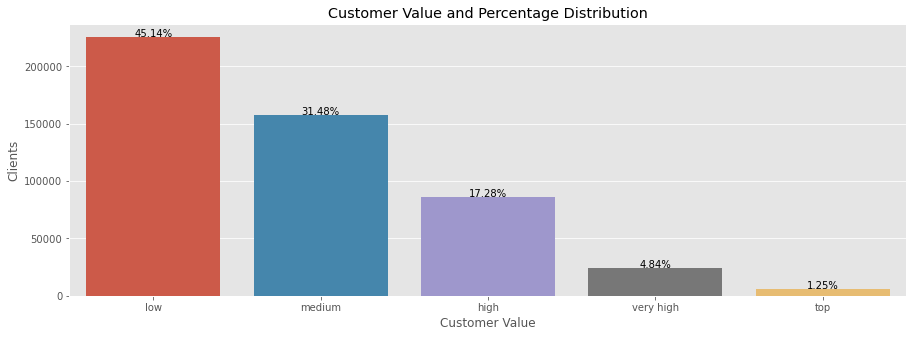

In [49]:
# Visualization for Customer Value Type

customer_value = df_duplicates_removed['customer_value'].value_counts()

total = len(df_duplicates_removed)
plt.figure(figsize=(15,5))
ax = sns.barplot(customer_value.index, customer_value.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

plt.title("Customer Value and Percentage Distribution")
plt.xlabel("Customer Value")
plt.ylabel("Clients")
plt.show()

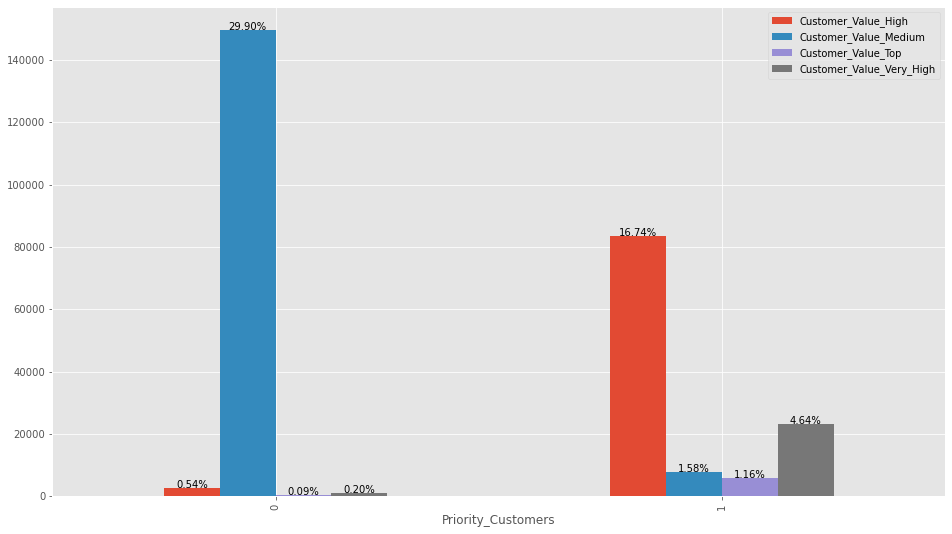

In [50]:
CuVa = expanded_dataset.groupby(['Priority_Customers']).agg({'Customer_Value_High':sum,
                                                   'Customer_Value_Medium':sum,
                                                   'Customer_Value_Top':sum,
                                                   'Customer_Value_Very_High':sum}).reset_index()

CuVax = CuVa.plot(x= "Priority_Customers", y=["Customer_Value_High", "Customer_Value_Medium", "Customer_Value_Top", "Customer_Value_Very_High"], kind="bar")
for p in CuVax.patches:
    height = p.get_height()
    CuVax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

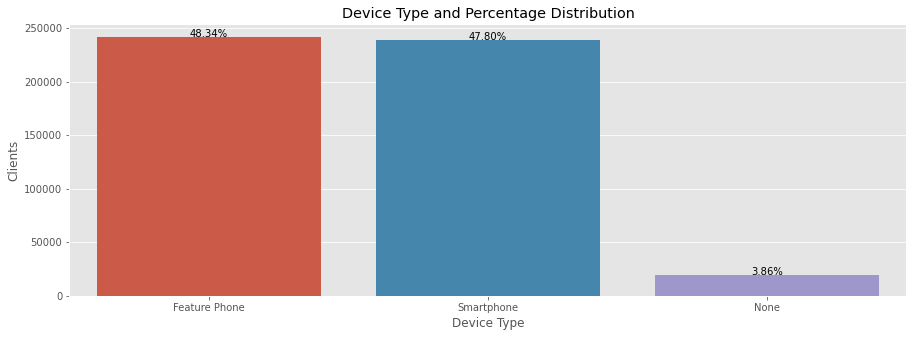

In [51]:
# Visualization for Customer Device Type

device_type = df_duplicates_removed['device_type'].value_counts()

total = len(df_duplicates_removed)
plt.figure(figsize=(15,5))
ax = sns.barplot(device_type.index, device_type.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

plt.title("Device Type and Percentage Distribution")
plt.xlabel("Device Type")
plt.ylabel("Clients")
plt.show()

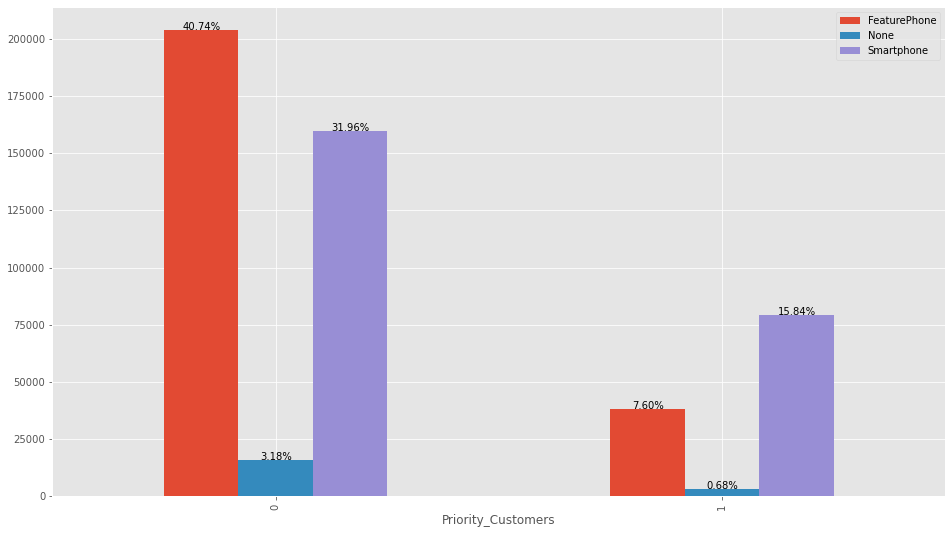

In [52]:
DevTy = expanded_dataset.groupby(['Priority_Customers']).agg({'FeaturePhone':sum,
                                                              'None':sum,
                                                              'Smartphone':sum}).reset_index()

DevTyx = DevTy.plot(x= "Priority_Customers", y=["FeaturePhone", "None", "Smartphone"], kind="bar")
for p in DevTyx.patches:
    height = p.get_height()
    DevTyx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

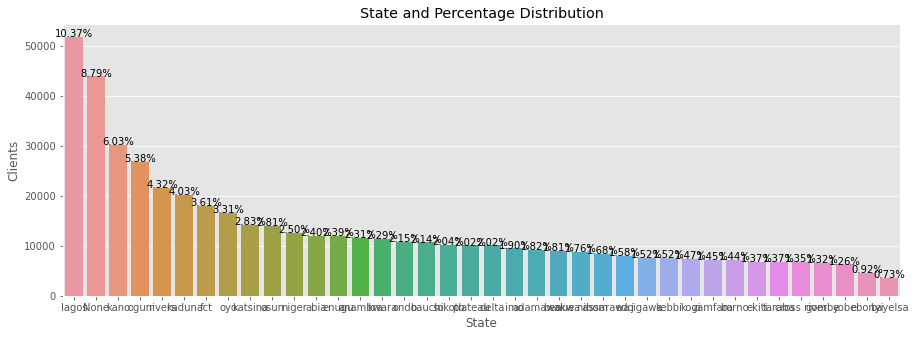

In [53]:
# Visualization for location_state Column

location_state = df_duplicates_removed['location_state'].value_counts()

total = len(df_duplicates_removed)
plt.figure(figsize=(15,5))
ax = sns.barplot(location_state.index, location_state.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f"{height/total*100 :1.2f}%",
            ha="center")

plt.title("State and Percentage Distribution")
plt.xlabel("State")
plt.ylabel("Clients")
plt.show()

## PRIRORITY CUSTOMERS <a class="anchor" id="FEATURESELECTIONANDENGINEERING"></a>

In [73]:
Customer_Priority = pd.concat([df_duplicates_removed, expanded_dataset1['Priority_Customers']], axis=1)
Customer_Priority.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Age_Group,Priority_Customers
0,004208affd43e227fee976bff7e1d4f9,399.220,0.000,0.000,0.000,0.000,46,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian,Adult,0
1,004a9ab7e14854125fe0a8baf7d1e085,686.340,75.000,0.000,6.800,0.000,46,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os,Youth,0
2,006924ffe0a892045b2d21858852c3b6,2392.280,295.000,12.000,925.500,700.000,46,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os,Middle- Aged,1
3,006a45bb6af240dfa54939e224a0d322,588.820,0.000,24.000,593.333,0.000,186,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os,Adult,0
4,00720f80366757a3ca167d417a7b34bd,0.000,4655.000,0.000,336.845,0.000,46,low,25,M,No,None,None,karu,tecno,t484,Feature Phone,proprietary os,proprietary os,Adult,0


In [74]:
# Printing the msisdn who are Priority Customers

Priority_Customers=Customer_Priority[Customer_Priority["Priority_Customers"]==1]
Not_Priority_Customers=Customer_Priority[Customer_Priority["Priority_Customers"]==0]

print('Number of msisdn =', len(Priority_Customers))
print('They are -', Priority_Customers["msisdn"].values)

Number of msisdn = 120612
They are - ['006924ffe0a892045b2d21858852c3b6' '00fb202e7d99d639d7ce6df4bc65c509'
 '012e40f3b260f42c25aedb9d8905b7bb' ... '712fe5142c89df7e6991d30291f99b8e'
 '71b286ba957ef73a87f6eb584e9250fa' '73a20daad80b307f53aa2de65182b665']


In [75]:
Priority_Customers

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Age_Group,Priority_Customers
2,006924ffe0a892045b2d21858852c3b6,2392.280,295.000,12.000,925.500,700.000,46,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os,Middle- Aged,1
8,00fb202e7d99d639d7ce6df4bc65c509,4075.520,400.000,16.000,830.200,0.000,186,high,38,F,No,north central,kwara,ilorin east,infinix,hot7 (x624b),Smartphone,google,android,Middle- Aged,1
11,012e40f3b260f42c25aedb9d8905b7bb,4988.380,260.000,0.000,1270.000,0.000,46,high,54,M,No,south east,anambra,oyi,samsung,sghr200s,Smartphone,samsung,samsung os,Middle- Aged,1
18,0292d2cf371e9b21d10e2e44e31f1de4,3895.560,230.000,88.000,4558.840,26.660,44,high,37,M,No,south east,imo,orlu,tecno,t349,Feature Phone,proprietary os,proprietary os,Middle- Aged,1
28,03ac9068e735761f101b193f4cb558e3,3588.460,0.000,0.000,1207.333,0.000,46,high,28,M,No,south west,lagos,oshodi-isolo,tecno,t454,Feature Phone,proprietary os,proprietary os,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499968,6f39a8f6c0134f432b22ba7914e6a6df,6334.750,0.000,0.000,0.000,0.000,49,very high,23,M,No,south east,imo,owerri west,infinix,note 5 (x604),Smartphone,google,android,Youth,1
499969,6f741b7a3072ed1033248fe6c2272832,2023.680,50.000,0.000,671.010,0.000,46,high,40,F,No,north east,borno,maiduguri,samsung,galaxy note iii (smn900),Smartphone,google,android,Middle- Aged,1
499981,712fe5142c89df7e6991d30291f99b8e,4333.820,120.000,0.000,3070.000,0.000,44,high,79,M,No,south south,rivers,emohua,nokia,1280,Smartphone,1282,symbian,Senior,1
499984,71b286ba957ef73a87f6eb584e9250fa,5855.710,250.000,64.000,860.450,0.000,44,very high,41,M,No,south east,abia,umuahia north,itel,it1516 plus,Smartphone,google,android,Middle- Aged,1


In [76]:
Not_Priority_Customers

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Age_Group,Priority_Customers
0,004208affd43e227fee976bff7e1d4f9,399.220,0.000,0.000,0.000,0.000,46,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian,Adult,0
1,004a9ab7e14854125fe0a8baf7d1e085,686.340,75.000,0.000,6.800,0.000,46,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os,Youth,0
3,006a45bb6af240dfa54939e224a0d322,588.820,0.000,24.000,593.333,0.000,186,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os,Adult,0
4,00720f80366757a3ca167d417a7b34bd,0.000,4655.000,0.000,336.845,0.000,46,low,25,M,No,None,None,karu,tecno,t484,Feature Phone,proprietary os,proprietary os,Adult,0
5,00ce1631dc15742a0aca70f5f8d9f4e9,1226.880,0.000,8.000,455.600,0.000,46,medium,24,F,No,north west,kaduna,kaduna south,tecno,f1,Smartphone,google,android,Youth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,72ddc5daa8cde0d15bfe1481c0e4c07d,1602.190,50.000,0.000,224.870,110.000,44,medium,31,M,No,north west,kebbi,yauri,infinix,hot,Smartphone,google,android,Adult,0
499995,72f1ead049fe58d090c498ec4322d631,130.580,0.000,0.000,69.800,55.660,19,low,35,M,No,south south,rivers,ikwerre,nokia,103,Feature Phone,symbian,symbian os,Adult,0
499996,72f6dcf8a2f26e600db24ffec39bc6f0,0.000,100.000,0.000,0.000,0.000,46,low,30,M,No,north central,niger,rijau,itel,it5190,Feature Phone,proprietary os,proprietary os,Adult,0
499997,7382359cde83b604e74692137c0dcc50,0.000,0.000,0.000,520.533,0.000,46,low,70,M,No,south east,anambra,ekwusigo,itel,it6800,Smartphone,google,android,Senior,0
